# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score 

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve, f1_score
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
# import sys
# np.set_printoptions(threshold=sys.maxsize)
!pip install catboost
!pip install imblearn
!pip install tensorflow
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


Could not fetch URL https://pypi.org/simple/catboost/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/catboost/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping
ERROR: Could not find a version that satisfies the requirement catboost (from versions: none)
ERROR: No matching distribution found for catboost
Could not fetch URL https://pypi.org/simple/imblearn/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/imblearn/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping
ERROR: Could not find a version that satisfies the requirement imblearn (from versions: none)
ERROR: No matching distribution found for imblearn
Could not fetch URL https://pypi.org/simple/typing-extensions/: There was a problem confirming t

# Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv')


# Data exploataion 

 **Understanding the data**


 Process of analysing data to better understand it; it can also be used to prepare data for pre processing modelling. 

In [3]:
dataset.head()
#check the first 5 row of the data 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#check the type of data in th columns
dataset.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
dataset.shape
# this return the number of rows and columns  in the dataset 

(5110, 12)

In [6]:
dataset.describe()
#this functuon will return count, mean, standard deviation, minimum and maximum values and the quantiles of the data of the numerical values 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 **checking all unique values**

In [7]:
dataset.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

**Checking outliers**
From the output above i can tell that bmi and avg_glucose_level have a large number of uniqure values  value. thise feature will be needed to check for outliers` 

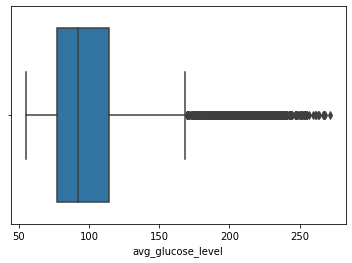

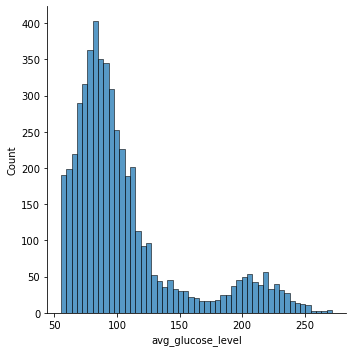

In [8]:

# Box plot
sns.boxplot(dataset.avg_glucose_level)

# Distribution plot
sns.displot(dataset.avg_glucose_level)

**Investigate into Age, Average Glucose Level, BMI**


Further investigate into Age, Average Glucose Level, BMI to spot for any corelation

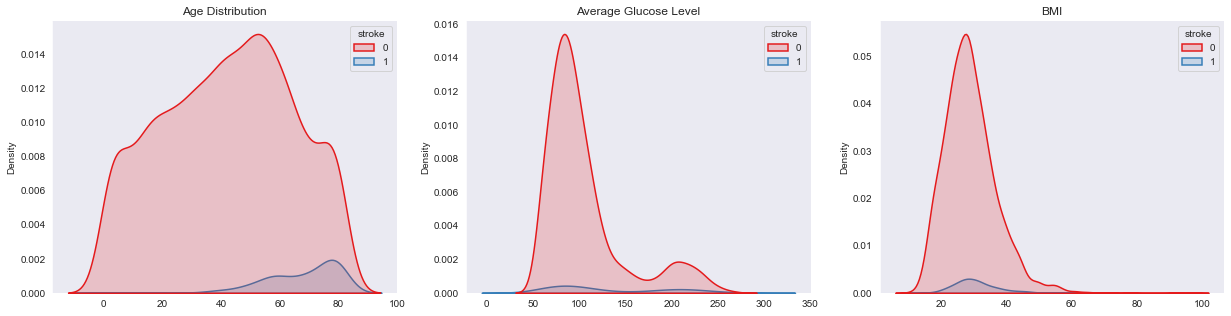

In [9]:

sns.set_style('dark')

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x='age', alpha=0.2, palette="Set1", label='Smoker', data =dataset, fill=True, linewidth=1.5, hue='stroke');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age Distribution');

plt.subplot(1,3,2)
sns.kdeplot(x=dataset['avg_glucose_level'], alpha=0.2, palette="Set1", label='avg_glucose_level',linewidth=1.5, fill=True, hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Average Glucose Level');

plt.subplot(1,3,3)
sns.kdeplot(x='bmi', alpha=0.2, palette="Set1", label='BMI',data = dataset, shade=True, linewidth=1.5, fill=True, hue='stroke');
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('BMI');

## Cleaning the data

**checking for null value**

In [10]:
dataset.isnull().sum()
#this function will retun columns and it null sum od it null value  

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
len(dataset.bmi)

5110

**Cleaning the data**

In [12]:
#dro all bmi rows with null values
dataset = dataset.dropna()


In [13]:
#drop the id colums 
dataset = dataset.drop('id', axis=1)
#drop the other in the gender 
dataset.drop(dataset.loc[dataset['gender']=='Other'].index, inplace=True)
dataset.age = dataset.age.round().astype('int')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Relationship analysis

<AxesSubplot:>

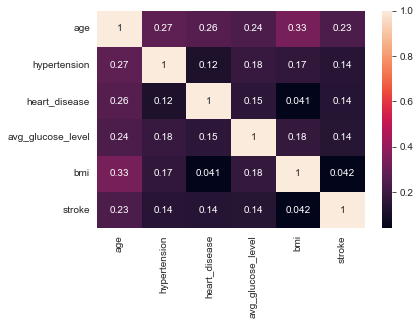

In [14]:
corre = dataset.corr()
#heatmaap aloww visualisation that uses color to show how a value of interest changes depending on the values of two other variables.
sns.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns,annot=True)

 **Visualising features**
 
 Start making some assumptions 

1.   Choice of residence, work, type, and glucose level can have effect possibility of one getting stroke  
2.    Gender, hypertension and any history of heart diseases effect the stroke probability¶



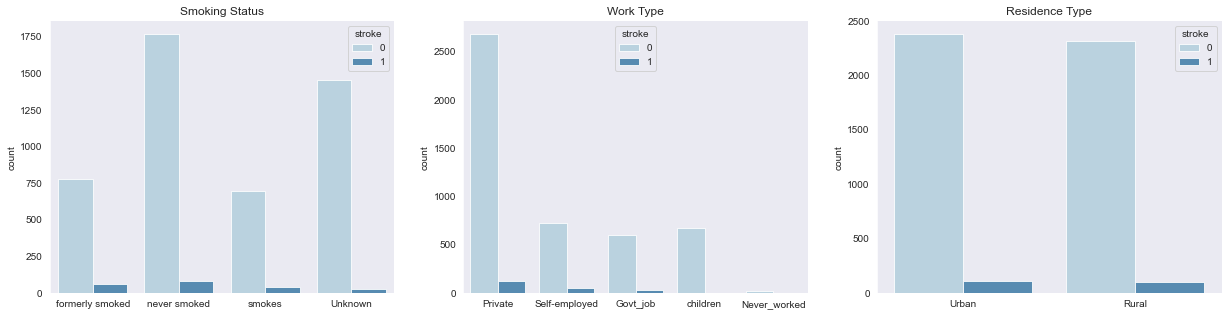

In [15]:
#1 Choice of residence, work, type, and glucose level can have effect possibility of one getting stroke

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x='smoking_status', alpha=0.8, palette="Paired",hue='stroke', data = dataset );
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Smoking Status');

plt.subplot(1,3,2)
sns.countplot(x='work_type', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Work Type');

plt.subplot(1,3,3)
sns.countplot(x='Residence_type', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Residence Type');



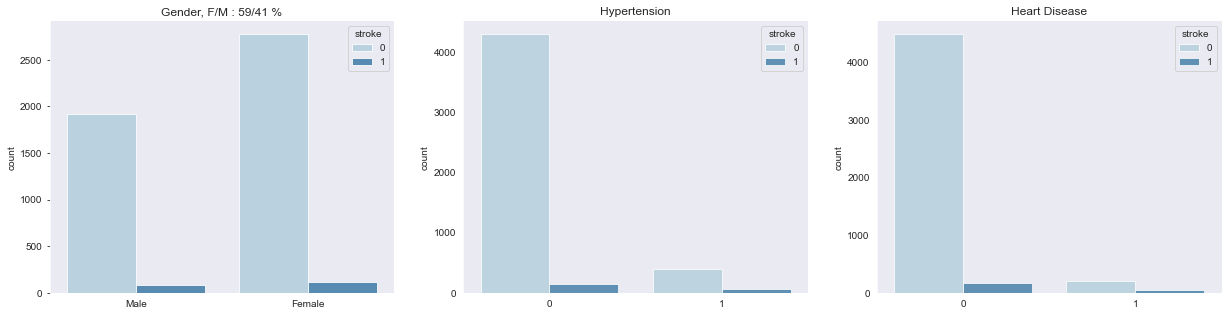

In [16]:
# 2 Gender, hypertension and any history of heart diseases effect the stroke probability¶
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x='gender', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender, F/M : 59/41 %');

plt.subplot(1,3,2)
sns.countplot(x='hypertension', alpha=0.75, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hypertension');

plt.subplot(1,3,3)
sns.countplot(x='heart_disease', alpha=0.75, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Heart Disease');

**check the ratio of the two to see the imbalances**

In [17]:

print("Patient that dont stroke ratio: " + str(dataset.stroke.value_counts()[1]/len(dataset)))
print("Patient that have stroke ratio : " + str(dataset.stroke.value_counts()[0]/len(dataset)))
dataset.stroke.value_counts()
dataset.stroke.value_counts()

Patient that dont stroke ratio: 0.04258353708231459
Patient that have stroke ratio : 0.9574164629176855


0    4699
1     209
Name: stroke, dtype: int64

Visualise age distribution 


<Figure size 1512x360 with 0 Axes>

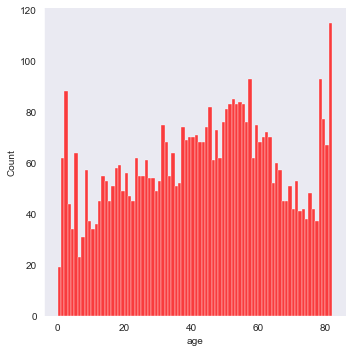

In [18]:
plt.figure(figsize=(21,5))
sns.displot(dataset['age'], bins=max(dataset['age']),color='red', kde=False);

**Visualise age and stroke **
this is need to check the ccorrelation betwen the row varibale 


<Figure size 720x360 with 0 Axes>

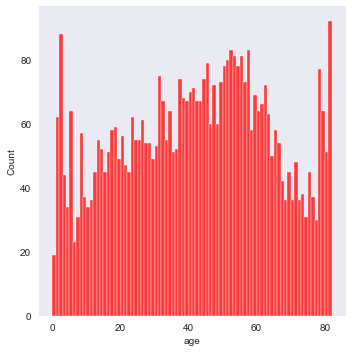

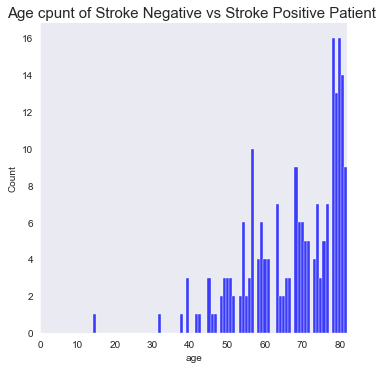

In [19]:
plt.figure(figsize=(10, 5))

sns.displot(dataset[dataset['stroke'] == 0]["age"], bins=max(dataset['age']), color='red',kde=False)
sns.displot(dataset[dataset['stroke'] == 1]["age"], bins=max(dataset['age']), color='blue', kde=False)

plt.title('Age cpunt of Stroke Negative vs Stroke Positive Patient ', fontsize=15)
plt.xlim([min(dataset['age']),max(dataset['age'])])
plt.show()

# Data Preprocessing 

Slicing the dataset into dependent and independent variable

In [20]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values 

### Encoding categorical data with label encoder


label encoding is used for datapoint with only two values

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,4] = le.fit_transform(X[:,4])
X[:,6] = le.fit_transform(X[:,6])


### One Hot Encoding the "Work_type and  "somke_status" column" column

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',
OneHotEncoder(), [5,9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Note** Onehotencoder is used one  datapoint with only two or more values which have numeric order

In [23]:
X

array([[0.0, 0.0, 1.0, ..., 1, 228.69, 36.6],
       [0.0, 0.0, 1.0, ..., 0, 105.92, 32.5],
       [0.0, 0.0, 1.0, ..., 1, 171.23, 34.4],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 0.0, 1.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

In [24]:
X.shape

(4908, 17)

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X, y = sm.fit_resample(X, y)


### Feature Selection 

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)

X = fit.transform(X)

[1.938e+00 2.200e+01 8.575e+00 9.230e+01 6.413e+02 2.907e+02 1.242e+02
 9.850e-01 2.984e+01 9.889e+00 2.978e+04 5.119e+02 4.939e+02 2.027e+02
 7.199e-04 1.912e+04 1.209e+02]


In [27]:
#patient to be used for preditction 
patient = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]

## Splitting dateset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size=0.2, random_state = 1)



**Handling imbalances data**

Verifying of  oversampling

In [29]:
X_test

array([[  0.   ,   0.   ,   1.   , ...,   0.   ,  96.422,  27.483],
       [  0.   ,   0.   ,   1.   , ...,   1.   , 197.69 ,  28.4  ],
       [  0.   ,   0.   ,   0.   , ...,   1.   ,  99.13 ,  22.8  ],
       ...,
       [  0.   ,   0.   ,   1.   , ...,   1.   , 212.776,  30.856],
       [  0.386,   0.   ,   0.614, ...,   1.   ,  68.451,  25.063],
       [  0.   ,   0.   ,   1.   , ...,   0.392, 215.187,  42.517]])

In [30]:
X_train

array([[0.000e+00, 0.000e+00, 5.233e-01, ..., 0.000e+00, 7.826e+01,
        1.967e+01],
       [6.970e-01, 0.000e+00, 3.030e-01, ..., 0.000e+00, 1.885e+02,
        3.022e+01],
       [8.889e-01, 0.000e+00, 1.111e-01, ..., 8.889e-01, 2.643e+02,
        3.786e+01],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 7.742e+01,
        2.610e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 7.908e+01,
        2.037e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.461e+01,
        2.840e+01]])

In [31]:
print(y_test)

[1 0 0 ... 1 1 1]


In [32]:
print(y_train)

[1 1 1 ... 0 1 0]


## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
print(X_test)

[[-0.434 -0.05   0.888 ... -1.105 -0.425 -0.292]
 [-0.434 -0.05   0.888 ...  1.074  1.392 -0.157]
 [-0.434 -0.05  -1.308 ...  1.074 -0.376 -0.982]
 ...
 [-0.434 -0.05   0.888 ...  1.074  1.662  0.205]
 [ 0.806 -0.05   0.041 ...  1.074 -0.927 -0.648]
 [-0.434 -0.05   0.888 ... -0.25   1.706  1.923]]


# Helper Functions

**Prediction Function**

In [35]:
#this function will be use to make predictions after models is train 
def prediction(classifier, X=X_test):
  y_pred = classifier.predict(X)

  print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
  print()

     #this condition check if model accuracy is below 90% if so it apply tunning using gridsearch
  if accuracy_score(y_test, y_pred) < 0.90:
    print("MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED ")
    grid_search_tunning(classifier,parameters)
    
  print()
  # Predicting the Test set results 
  print("Predicting the Test set results ")
  #matching all predtiction with true values this help eliminate overfiting
  print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
  print()
  print(f" Predicting for: ")
  #get the patient that will be used to make prediction from dataset
  print(dataset[:1])
  print(f" y_predicted :{classifier.predict(sc.transform([patient]))}")
  print("==================================================================")
  print()





**Function for training models** 

In [36]:
def trainmodels(classifier, X_train, y_train):

  #this function takes the untrain models, train it then return the train model

  classifier.fit(X_train, y_train)
  #calling the prediction function to make predictions on the train models
  prediction(classifier)
  #making confusion matrix
  makin_confusion_matrix(classifier)
  

  #this function return nthe train model.
  return classifier


**Making the Confusion Matrix Function**

In [37]:
def makin_confusion_matrix(classifier,X=X_test):
  #this function takes train model and make matrix on it 
  y_pred = classifier.predict(X)
  cm = confusion_matrix(y_test, y_pred )
  classifier_report=classification_report(y_test, y_pred )
  print()
  print("Making the Confusion Matrix")
  print("**************************")
  print("Accuracy: {:.2f} %".format(accuracy_score(y_test,y_pred)*100))
  print(cm)
  print("")
  print("")
  print("Accuracy repeort")
  print(classifier_report)
  

  


**Plot Confusion matrix function **

In [38]:
def plot_confusion_matrix(classifier, X=X_test):
  y_pred = classifier.predict(X)
  cm_map = sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap='OrRd', fmt='g')
  plt.show(cm_map)

**Function for app K-Fold cross validation**

In [39]:
def k_fold_cross_validation(classifier, X_train, y_train, cv:int):
  print("****************************************************")
  accuracies = cross_val_score(estimator =  classifier, X = X_train, y = y_train, cv = 15)
  print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
  
  

**Function for Grid search fine tuning**

**Note:** tunning is only apply to models with accuracy below 90%

In [40]:
def grid_search_tunning (classifier,parameters):
  grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, verbose=1, cv=10, n_jobs=-1)
  grid_search.fit(X_train, y_train)
  best_accuracy = grid_search.best_score_
  best_parameters = grid_search.best_params_
  print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
  print("Best Parameters:", best_parameters)

# Classifications Modeling 

## Logistic Regression

In [41]:
parameters = {
    'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25],'class_weight':['dict' 'balanced']}
LR = trainmodels(LogisticRegression(class_weight='balanace'),X_train, y_train)

Accuracy: 77.82 %

MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED 
Fitting 10 folds for each of 16 candidates, totalling 160 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_v

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_v

Best Accuracy: 78.04 %
Best Parameters: {'C': 0.009, 'class_weight': 'dictbalanced', 'penalty': 'l2'}

Predicting the Test set results 
[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 77.82 %
[[696 234]
 [183 767]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       930
           1       0.77      0.81      0.79       950

    accuracy                           0.78      1880
   macro avg       0.78      0.78      0.78      1880
weighted avg       0.78      0.78      0.78      1880



**Tunning using GridSearch**

**Note: gridsearch is only applied on low preforming models**

## Random Forest 

**Training the Random Forest Classification model on the Training set**

In [42]:
RF= trainmodels(RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),X_train, y_train)

Accuracy: 97.45 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 97.45 %
[[921   9]
 [ 39 911]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       930
           1       0.99      0.96      0.97       950

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



## Decision Tree Classification

**Training the Random Forest Classification model on the Training set**

In [43]:
parameters = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
DTC= trainmodels(DecisionTreeClassifier(criterion = 'entropy'),X_train,y_train)

Accuracy: 95.21 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 95.21 %
[[877  53]
 [ 37 913]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       930
           1       0.95      0.96      0.95       950

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880



## Naive Bayes

**Training the Naive Bayes model on the Training set**

In [44]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)
}
NB =trainmodels(GaussianNB(),X_train,y_train) 

Accuracy: 63.09 %

MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED 
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Accuracy: 72.23 %
Best Parameters: {'var_smoothing': 0.12328467394420659}

Predicting the Test set results 
[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 63.09 %
[[237 693]
 [  1 949]]


Accuracy repeort
              precision    recall  f1-score   support

           0       1.00      0.25      0.41       930
           1       0.58      1.00      0.73       950

    accuracy                           0.63      1880
   macro avg       0.79      0.63      0.57      1880


**Tunning using GridSearch**

## K-Nearest Neighbors (K-NN)

**Training the K-NN model on the Training set**

In [45]:
KNN = trainmodels(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),X_train,y_train)

Accuracy: 93.72 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 93.72 %
[[820 110]
 [  8 942]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       930
           1       0.90      0.99      0.94       950

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



## Kernel SVM

**Training the Kernel SVM model on the Training set**

In [46]:
KSVM=trainmodels(SVC(kernel = 'rbf', random_state = 0), X_train,y_train)

Accuracy: 93.14 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 93.14 %
[[883  47]
 [ 82 868]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       930
           1       0.95      0.91      0.93       950

    accuracy                           0.93      1880
   macro avg       0.93      0.93      0.93      1880
weighted avg       0.93      0.93      0.93      1880



# Gradient boosting Classifications modeling

## Xgboost

### Training xgboost

In [48]:
XGB = trainmodels(XGBClassifier(),X_train,y_train)

[05:42:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 97.18 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 97.18 %
[[915  15]
 [ 38 912]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       930
           1       0.98      0.96      0.97       950

    accuracy                           0.97      188

## CatBoost

###Training Catboots

In [49]:
CAT =trainmodels(CatBoostClassifier(),X_train, y_train)

Learning rate set to 0.02438
0:	learn: 0.6515001	total: 67.2ms	remaining: 1m 7s
1:	learn: 0.6251190	total: 69.8ms	remaining: 34.8s
2:	learn: 0.5928733	total: 72.2ms	remaining: 24s
3:	learn: 0.5665242	total: 74.6ms	remaining: 18.6s
4:	learn: 0.5483826	total: 77ms	remaining: 15.3s
5:	learn: 0.5295135	total: 79.9ms	remaining: 13.2s
6:	learn: 0.5079601	total: 82.6ms	remaining: 11.7s
7:	learn: 0.4893796	total: 85.3ms	remaining: 10.6s
8:	learn: 0.4679111	total: 87.7ms	remaining: 9.65s
9:	learn: 0.4457605	total: 90.5ms	remaining: 8.96s
10:	learn: 0.4284794	total: 92.8ms	remaining: 8.34s
11:	learn: 0.4154712	total: 95.9ms	remaining: 7.89s
12:	learn: 0.4063418	total: 98.6ms	remaining: 7.49s
13:	learn: 0.3911881	total: 101ms	remaining: 7.12s
14:	learn: 0.3785887	total: 104ms	remaining: 6.83s
15:	learn: 0.3679429	total: 107ms	remaining: 6.59s
16:	learn: 0.3611088	total: 110ms	remaining: 6.38s
17:	learn: 0.3482854	total: 113ms	remaining: 6.19s
18:	learn: 0.3405101	total: 116ms	remaining: 5.98s
19:

162:	learn: 0.0954161	total: 501ms	remaining: 2.57s
163:	learn: 0.0952468	total: 503ms	remaining: 2.56s
164:	learn: 0.0950581	total: 505ms	remaining: 2.56s
165:	learn: 0.0949001	total: 508ms	remaining: 2.55s
166:	learn: 0.0946780	total: 510ms	remaining: 2.54s
167:	learn: 0.0944227	total: 513ms	remaining: 2.54s
168:	learn: 0.0940979	total: 516ms	remaining: 2.54s
169:	learn: 0.0937941	total: 518ms	remaining: 2.53s
170:	learn: 0.0936813	total: 521ms	remaining: 2.52s
171:	learn: 0.0934960	total: 524ms	remaining: 2.52s
172:	learn: 0.0932256	total: 526ms	remaining: 2.52s
173:	learn: 0.0930647	total: 529ms	remaining: 2.51s
174:	learn: 0.0927119	total: 531ms	remaining: 2.5s
175:	learn: 0.0924837	total: 534ms	remaining: 2.5s
176:	learn: 0.0921950	total: 537ms	remaining: 2.49s
177:	learn: 0.0918941	total: 540ms	remaining: 2.49s
178:	learn: 0.0917410	total: 542ms	remaining: 2.48s
179:	learn: 0.0915558	total: 545ms	remaining: 2.48s
180:	learn: 0.0913630	total: 548ms	remaining: 2.48s
181:	learn: 0.

339:	learn: 0.0705133	total: 972ms	remaining: 1.89s
340:	learn: 0.0703983	total: 974ms	remaining: 1.88s
341:	learn: 0.0703435	total: 977ms	remaining: 1.88s
342:	learn: 0.0702758	total: 980ms	remaining: 1.88s
343:	learn: 0.0702080	total: 983ms	remaining: 1.87s
344:	learn: 0.0701407	total: 986ms	remaining: 1.87s
345:	learn: 0.0700204	total: 988ms	remaining: 1.87s
346:	learn: 0.0699486	total: 991ms	remaining: 1.86s
347:	learn: 0.0698113	total: 993ms	remaining: 1.86s
348:	learn: 0.0697571	total: 995ms	remaining: 1.86s
349:	learn: 0.0697176	total: 998ms	remaining: 1.85s
350:	learn: 0.0695959	total: 1s	remaining: 1.85s
351:	learn: 0.0695094	total: 1s	remaining: 1.85s
352:	learn: 0.0694012	total: 1s	remaining: 1.84s
353:	learn: 0.0692928	total: 1.01s	remaining: 1.84s
354:	learn: 0.0692228	total: 1.01s	remaining: 1.84s
355:	learn: 0.0690759	total: 1.01s	remaining: 1.83s
356:	learn: 0.0689594	total: 1.01s	remaining: 1.83s
357:	learn: 0.0688531	total: 1.02s	remaining: 1.83s
358:	learn: 0.0687721

530:	learn: 0.0560242	total: 1.48s	remaining: 1.31s
531:	learn: 0.0559892	total: 1.49s	remaining: 1.31s
532:	learn: 0.0559294	total: 1.49s	remaining: 1.3s
533:	learn: 0.0558558	total: 1.49s	remaining: 1.3s
534:	learn: 0.0558133	total: 1.5s	remaining: 1.3s
535:	learn: 0.0557497	total: 1.5s	remaining: 1.3s
536:	learn: 0.0556386	total: 1.5s	remaining: 1.29s
537:	learn: 0.0555984	total: 1.51s	remaining: 1.29s
538:	learn: 0.0555457	total: 1.51s	remaining: 1.29s
539:	learn: 0.0554940	total: 1.51s	remaining: 1.29s
540:	learn: 0.0554485	total: 1.51s	remaining: 1.28s
541:	learn: 0.0553876	total: 1.52s	remaining: 1.28s
542:	learn: 0.0553708	total: 1.52s	remaining: 1.28s
543:	learn: 0.0552514	total: 1.52s	remaining: 1.28s
544:	learn: 0.0551583	total: 1.52s	remaining: 1.27s
545:	learn: 0.0550958	total: 1.53s	remaining: 1.27s
546:	learn: 0.0550276	total: 1.53s	remaining: 1.27s
547:	learn: 0.0549760	total: 1.53s	remaining: 1.26s
548:	learn: 0.0549423	total: 1.54s	remaining: 1.26s
549:	learn: 0.05490

698:	learn: 0.0471592	total: 1.95s	remaining: 839ms
699:	learn: 0.0470983	total: 1.95s	remaining: 837ms
700:	learn: 0.0470520	total: 1.95s	remaining: 834ms
701:	learn: 0.0470313	total: 1.96s	remaining: 831ms
702:	learn: 0.0469892	total: 1.96s	remaining: 828ms
703:	learn: 0.0469517	total: 1.96s	remaining: 826ms
704:	learn: 0.0468815	total: 1.97s	remaining: 823ms
705:	learn: 0.0468603	total: 1.97s	remaining: 821ms
706:	learn: 0.0467937	total: 1.97s	remaining: 818ms
707:	learn: 0.0467434	total: 1.98s	remaining: 815ms
708:	learn: 0.0466801	total: 1.98s	remaining: 812ms
709:	learn: 0.0466329	total: 1.98s	remaining: 810ms
710:	learn: 0.0466095	total: 1.99s	remaining: 807ms
711:	learn: 0.0465460	total: 1.99s	remaining: 804ms
712:	learn: 0.0465038	total: 1.99s	remaining: 802ms
713:	learn: 0.0464752	total: 1.99s	remaining: 799ms
714:	learn: 0.0464632	total: 2s	remaining: 796ms
715:	learn: 0.0464339	total: 2s	remaining: 794ms
716:	learn: 0.0464048	total: 2s	remaining: 791ms
717:	learn: 0.0463159

888:	learn: 0.0389108	total: 2.47s	remaining: 308ms
889:	learn: 0.0388618	total: 2.47s	remaining: 305ms
890:	learn: 0.0388270	total: 2.47s	remaining: 303ms
891:	learn: 0.0387483	total: 2.48s	remaining: 300ms
892:	learn: 0.0387424	total: 2.48s	remaining: 297ms
893:	learn: 0.0386955	total: 2.48s	remaining: 294ms
894:	learn: 0.0386672	total: 2.48s	remaining: 291ms
895:	learn: 0.0385930	total: 2.49s	remaining: 289ms
896:	learn: 0.0385647	total: 2.49s	remaining: 286ms
897:	learn: 0.0385579	total: 2.49s	remaining: 283ms
898:	learn: 0.0385342	total: 2.5s	remaining: 280ms
899:	learn: 0.0384886	total: 2.5s	remaining: 278ms
900:	learn: 0.0384531	total: 2.5s	remaining: 275ms
901:	learn: 0.0383946	total: 2.5s	remaining: 272ms
902:	learn: 0.0383507	total: 2.5s	remaining: 269ms
903:	learn: 0.0383081	total: 2.51s	remaining: 266ms
904:	learn: 0.0382728	total: 2.51s	remaining: 264ms
905:	learn: 0.0382025	total: 2.51s	remaining: 261ms
906:	learn: 0.0381884	total: 2.52s	remaining: 258ms
907:	learn: 0.038

**Predicting the Test set results**

---




# Deep Learning Classifications Modeling

In [ ]:
import tensorflow as tf

## Artificial Neural Network

### Initialising the ANN

In [ ]:
ann = tf.keras.models.Sequential()

###Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

###Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

###Comapeling ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###Training the ANN

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

**Predict stroke risk factor for a patient**

In [ ]:

print(ann.predict(sc.transform([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]]))> 0.5)


In [ ]:
print(" possibility")

print(ann.predict(sc.transform([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]])))

**Predicting the Test set**

In [ ]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
print(np.concatenate((y_pred_ann.reshape(len(y_pred_ann),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
accuracy_score(y_test, y_pred_ann)
ann_report=classification_report(y_test, y_pred_ann)
print(accuracy_score(y_test, y_pred_ann))
sns.heatmap(confusion_matrix(y_test, y_pred_ann),annot=True,cmap='OrRd', fmt='g' )
plt.title('Artificial Neural Network')

In [ ]:
print(ann_report)

# Dictionary of Trained Models 

In [ ]:
models = { "Logistic Regression":LR, " Random Forest":RF, "Decision Tree Classification":DTC,
        "Naive Bayes":NB ,"K-Nearest Neighbors (K-NN)":KNN,"Kernel SVM":KSVM,
       "XGBboots" :XGB, "Catboost": CAT }
        

# Applying k-Fold Cross Validation on all models 

In [ ]:
for names,model, in models.items():
  print(f" Cross validation results {names}")
  k_fold_cross_validation(model,X_train,y_train,15)
  print()

# Evaluating and visualise results.

In [ ]:
for names,model, in models.items():
  plot_roc_curve(model, X_test, y_test)
  plt.title(names)

In [ ]:
for names,model, in models.items():
  plt.title(names)
  plot_confusion_matrix(model)
  